In [1]:
# Import Libraries
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Load CIFAR10 Dataset
(x_train, y_train), (x_test, y_test) =keras.datasets.cifar10.load_data()

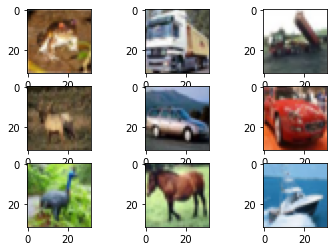

In [3]:
# See images
for i in range(9):
    plt.subplot(330 + 1 + i)
    # Plot raw pixel data
    plt.imshow(x_train[i])
# Show the figure
plt.show()

**50.000** Images, **32x32** pixels, **3** Colors (RGB)

In [4]:
print((x_train.shape, x_test.shape))

((50000, 32, 32, 3), (10000, 32, 32, 3))


In [5]:
# Rescale
x_train = x_train / 255
x_test = x_test / 255

In [6]:
# Model Creation
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32,32,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(loss = 'sparse_categorical_crossentropy',
          optimizer='adam',
          metrics=['acc'])

In [7]:
# Train the model
history = model.fit(x_train, y_train,
                    epochs=100,
                    # Experiment with steps, 25 best so far
                    steps_per_epoch=25,
                    batch_size=65,
                    validation_data = (x_test, y_test),
                    verbose = 1)

Epoch 1/100
25/25 [==============================] - 5s 177ms/step - loss: 2.2330 - acc: 0.1526 - val_loss: 2.0927 - val_acc: 0.2712
Epoch 2/100
25/25 [==============================] - 4s 146ms/step - loss: 1.9872 - acc: 0.2745 - val_loss: 1.8979 - val_acc: 0.3420
Epoch 3/100
25/25 [==============================] - 3s 125ms/step - loss: 1.8625 - acc: 0.3194 - val_loss: 1.8134 - val_acc: 0.3543
Epoch 4/100
25/25 [==============================] - 3s 126ms/step - loss: 1.8185 - acc: 0.3305 - val_loss: 1.7173 - val_acc: 0.4178
Epoch 5/100
25/25 [==============================] - 3s 127ms/step - loss: 1.7093 - acc: 0.3662 - val_loss: 1.6709 - val_acc: 0.4121
Epoch 6/100
25/25 [==============================] - 3s 131ms/step - loss: 1.6404 - acc: 0.3951 - val_loss: 1.6032 - val_acc: 0.4317
Epoch 7/100
25/25 [==============================] - 3s 137ms/step - loss: 1.5807 - acc: 0.4302 - val_loss: 1.5435 - val_acc: 0.4508
Epoch 8/100
25/25 [==============================] - 3s 136ms/step - 

Text(0.5, 1.0, 'Training and validation loss')

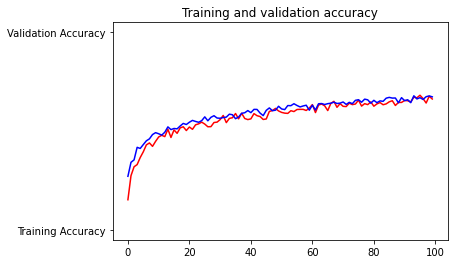

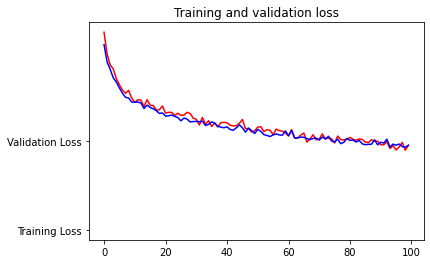

In [13]:
# Retrieve a list of list results on training and test datasets for each training epoch
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs


# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, 'r', 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', 'Validation Accuracy')
plt.title('Training and validation accuracy')
plt.figure()


# Plot training and validation loss per epoch
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')



                                    Here are the picture samples for testing our model
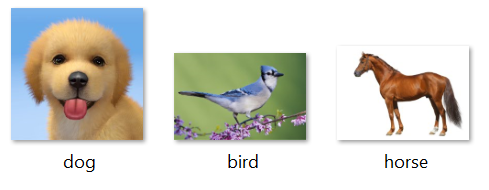

In [17]:
# Load Images, target size same as CIFAR10 size
img = image.load_img("C:\\Users\\Main\\Downloads\\dog.png", target_size=(32,32))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

img = image.load_img("C:\\Users\\Main\\Downloads\\bird.png", target_size=(32,32))
y = image.img_to_array(img)
y = np.expand_dims(y, axis=0)

img = image.load_img("C:\\Users\\Main\\Downloads\\horse.jpg", target_size=(32,32))
z = image.img_to_array(img)
z = np.expand_dims(z, axis=0)

In [23]:
# Pass the list of multiple images to predict
images = np.vstack([x, y, z])
classes = model.predict_classes(images, batch_size=10)
# Print the class of images loaded
print(classes)

[5 0 7]


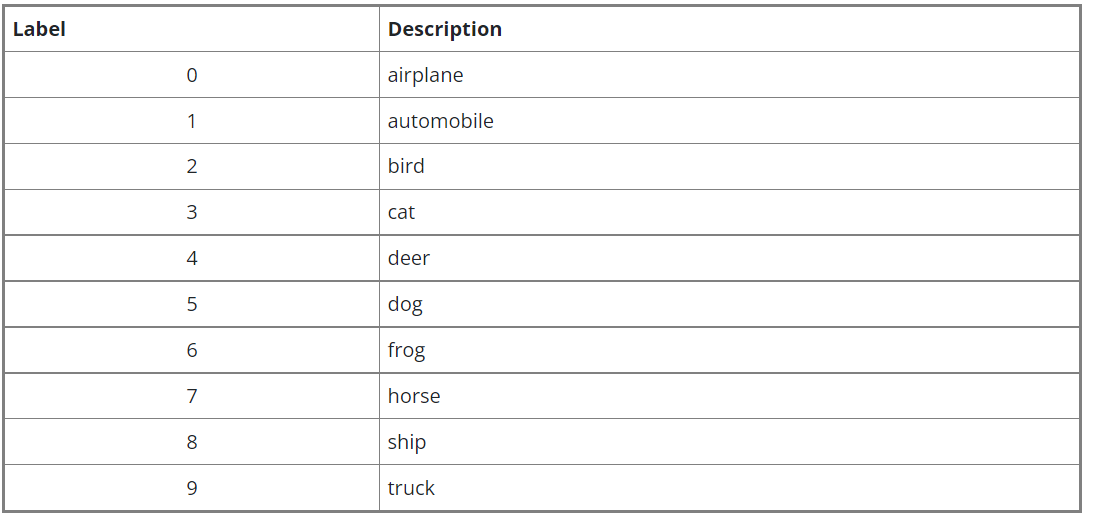